<center>
    <h1>Analysis of the ICFHR 2020 Competition on Image Retrieval for Historical Handwritten Fragments (HisFrag20) Dataset</h1>
    <hr>
    <br>
    <div style="margin:0 60px 0px 0">
        <img src="./../../readme-head.png" align=center width=500>
    </div>
    <h2>Data Understanding for solving a Jigsaw Puzzle of Historical Fragments</h2>
    <h3> by Timo Bohnstedt</h3>
    <br>
</center>


<a name='0'></a>

### Outline for this Notebook `(clickable)`

1. [Data Distribution](#1) <br>
1.1. [Are the IDs meaningful? If not, where can I get more meaningful data?](#1.1) <br>
1.2. [How many writers are there?](#1.2) <br>
1.3. [How many pages do the autohers have?](#1.3) <br>
1.4. [How many fragments are there per page?](#1.3) <br>
2. [Image Analysis](#2) <br>
2.1. [How large are the fragments?](#1.2) <br>
2.2. [How does the work of an writer look like?](#1.3.)<br>
2.3. [How does a page of a particular author look like?](#1.3.)<br>
2.4. [What does it look like when an image is gradually assembled (GIF)?](#1.3.)<br>
2.5. [Optional: Is there any further information, e.g. where the pictures come from?](#1.3.)<br>

## 0. Preparation of the Notebook

In [1]:
# import packages
from os import listdir, path
from os.path import isfile, join, splitext
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from PIL import Image

In [2]:
# declare global variables 
data_path = "/Users/beantown/Projekte/Jigsaw-Puzzling/Data/hisfrag20"
data_path_test = "/Users/beantown/Projekte/Jigsaw-Puzzling/Data/hisfrag20_test"

In [3]:
# prepare environtment
%matplotlib inline

In [4]:
# prepare plots

from helper_functions import set_size
sns.set(style="whitegrid")
plt.style.use('seaborn')
width = 496.85625

In [5]:
# load file names train dataset
file_names = [splitext(f)[0] for f in listdir(data_path) if isfile(join(data_path, f))]

# load file name test dataset
file_names_test = [splitext(f)[0] for f in listdir(data_path_test) if isfile(join(data_path_test, f))]

<a name='1'></a>

## 1. Data Distribution

<a name='1.1'></a>

### 1.1. Are the IDs meaningful? If not, where can I get more meaningful data?


The dataset contains a training and a test set with the following image naming-convention: 

```ruby
WID_PID_FID.jpg 

where 
WID = writer id
PID = page id, 
FID = fragment id.

```

The **train set** contains arround **100,000 fragments** using the Historical-IR19 as base dataset, they should all contain some text even some fragments are quite small. The **test set** contains about **20,000** new fragments

First, I will print the filename (label) to see wheather or not the label tells something meaninful

In [6]:
# For training
print(file_names[0])

# For test
print(file_names_test[0])

9121_4046_13
219_77800500_10553


As can be seen the IDs are just IDs. Some reasrch has shown that is up to now not possible to get more information about the writer. But we can cange an save the name such that it is more meaninfull in terms of the nameing convention.

<a name='1.2'></a>
### 1.2. How many writers are there?

In [7]:
# Split the image naming in wirter, page and fragment
# For training
file_names_parts = [i.split("_") for i in file_names]
# For test
file_names_test_parts = [i.split("_") for i in file_names_test]

In [8]:
file_names_parts[0]

['9121', '4046', '13']

In [9]:
# For training
df = pd.DataFrame.from_records(file_names_parts,columns=['writer_id', 'page_id','fragment_id'])
print('Within the train dataset there are {} unique writers'.format(df.nunique()[0])) 

Within the train dataset there are 8717 unique writers


In [10]:
# For test
df_test = pd.DataFrame.from_records(file_names_test_parts,columns=['writer_id', 'page_id','fragment_id'])
print('Within the test dataset there are {} unique writers'.format(df_test.nunique()[0]))

Within the test dataset there are 1152 unique writers


<a name='1.3'></a>
### 1.3. How many pages do the writers have?

In [11]:
pages_per_writer = df.groupby('writer_id')['page_id'].nunique()
pages_per_writer

writer_id
1000     1
10000    5
10001    5
10002    4
10003    5
        ..
9995     5
9996     5
9997     5
9998     4
9999     4
Name: page_id, Length: 8717, dtype: int64

In [12]:
# Get more information about the distribution of pages within the dataset
mean = pages_per_writer.mean()
median = pages_per_writer.median()
mu = pages_per_writer.std()
max_pages = pages_per_writer.max()
min_pages = pages_per_writer.min()

print('Every writer has {} pages on avarrage while the median is {} and the standard deviation is {}. The writer with the most pages has written {}. The writer with the least pages has written just {}page'.format(mean,median,mu,max_pages,min_pages))

Every writer has 1.9756797063209819 pages on avarrage while the median is 1.0 and the standard deviation is 1.6078643097493543. The writer with the most pages has written 5. The writer with the least pages has written just 1page


In [13]:
pages_per_writer_value_counts = pages_per_writer.value_counts().to_frame().sort_values("page_id")
pages_per_writer_value_counts['index'] = pages_per_writer_value_counts.index
print(pages_per_writer_value_counts)

   page_id  index
2      112      2
3      312      3
4      535      4
5     1541      5
1     6217      1


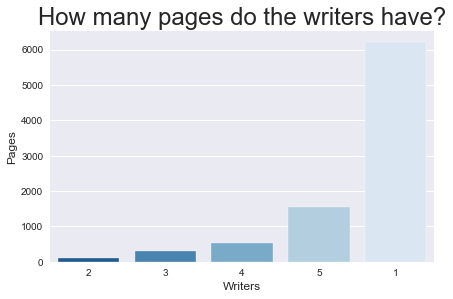

In [14]:
fig = plt.figure(figsize=set_size(width))
ax = sns.barplot(x ='index',y='page_id',data=pages_per_writer_value_counts, palette='Blues_r',order = pages_per_writer_value_counts.index)
ax.set_xlabel('Writers')
ax.set_ylabel('Pages')
ax.set_title('How many pages do the writers have?') 
fig.savefig('How many pages do the writers have.svg', format='svg', bbox_inches='tight',cmap='gray')

It seems that that the amount of pages is not even at all. We should use this knowledge within the preproceccing

<a name='1.4'></a>
### 1.4. How many fragments are there per page?

In [15]:
fragments_per_page = df.groupby('page_id')['fragment_id'].nunique()
fragments_per_page

page_id
0       2
1       3
10      2
100     2
1000    3
       ..
9994    2
9995    3
9996    2
9997    2
9999    2
Name: fragment_id, Length: 17222, dtype: int64

In [16]:
# Get more information about the distribution of fragments within the dataset
mean = fragments_per_page.mean()
median = fragments_per_page.median()
mu = fragments_per_page.std()
max_pages = fragments_per_page.max()
min_pages = fragments_per_page.min()

print('Every page has {} fragments on avarrage while the median is {} and the standard deviation is {}. The page with the most fragments has {} fragments. The page with the least fragments has just {} fragment'.format(mean,median,mu,max_pages,min_pages))

Every page has 5.905643943792823 fragments on avarrage while the median is 2.0 and the standard deviation is 9.738553339049178. The page with the most fragments has 77 fragments. The page with the least fragments has just 2 fragment


In [17]:
fragments_per_page_value_counts = fragments_per_page.value_counts().to_frame()
fragments_per_page_value_counts['fragments'] = fragments_per_page_value_counts.index
fragments_per_page_value_counts = fragments_per_page_value_counts.sort_values('fragments')
print(fragments_per_page_value_counts)

    fragment_id  fragments
2          8821          2
3          4997          3
4          1172          4
5           196          5
6            11          6
..          ...        ...
70            1         70
72            1         72
74            1         74
76            1         76
77            1         77

[67 rows x 2 columns]


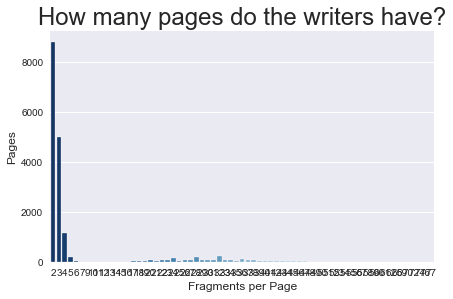

In [18]:
fig = plt.figure(figsize=set_size(width))
ax = sns.barplot(x ='fragments',y='fragment_id',data=fragments_per_page_value_counts, palette='Blues_r',order = fragments_per_page_value_counts.index)
ax.set_xlabel('Fragments per Page')
ax.set_ylabel('Pages')
ax.set_title('How many pages do the writers have?') 
fig.savefig('How often do pages occur with x fragments?.svg', format='svg', bbox_inches='tight',cmap='gray')

However, it is clear that papers are divided into two fragments by far more often than in any other number ...

<a name='2'></a>

## 2. Image Analysis

<a name='2.1'></a>
### 2.1. How large are the fragments?

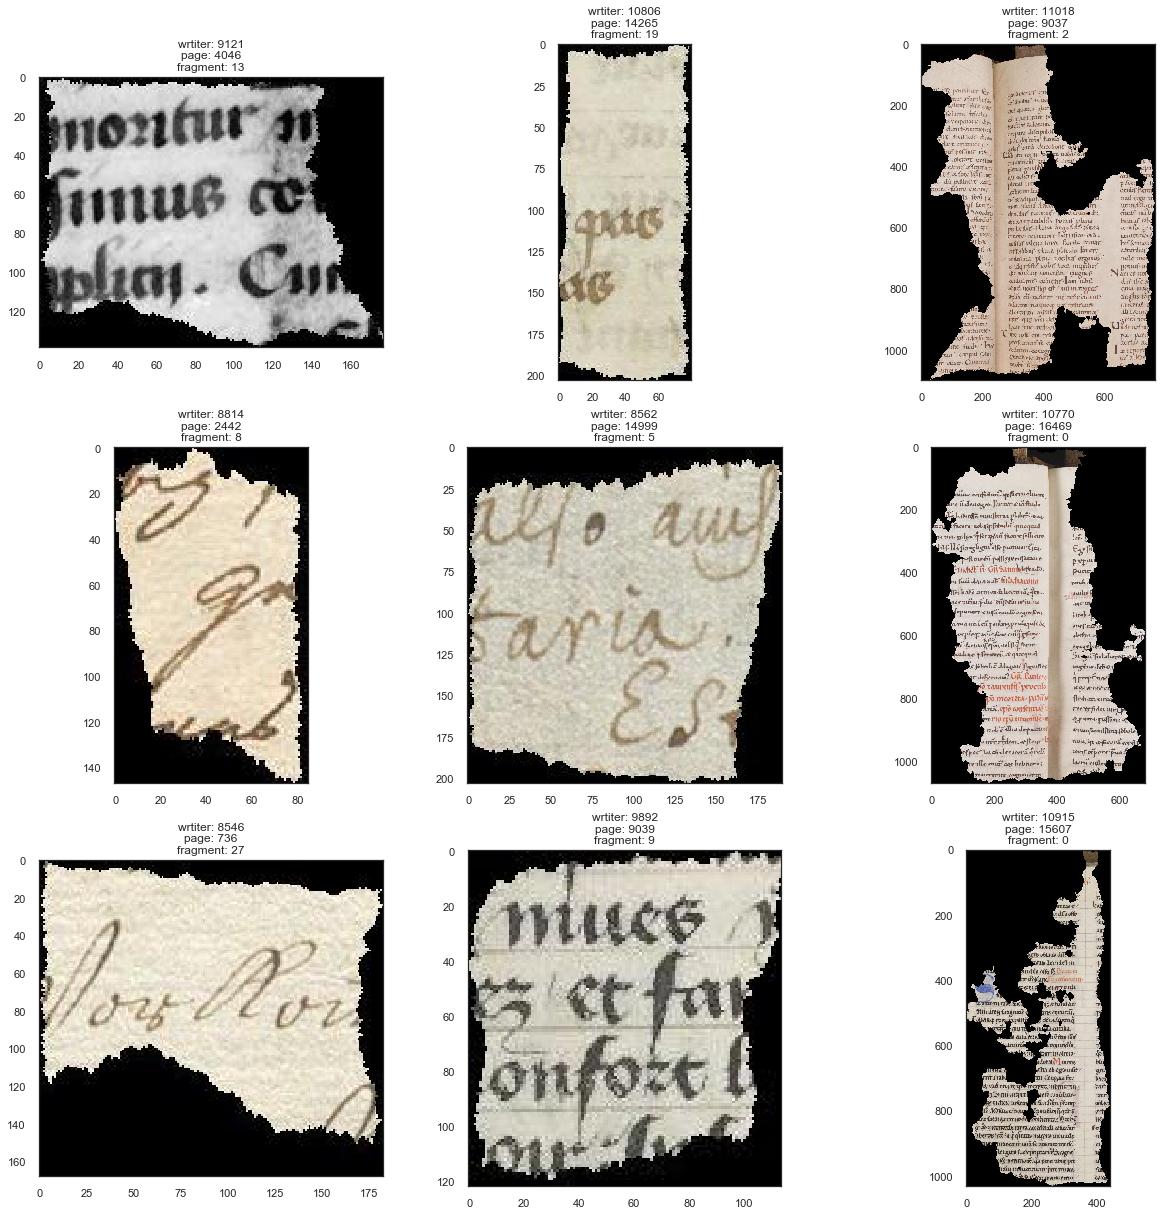

In [19]:
sns.set(style="white")
fig = plt.figure(figsize=(21, 21))
fig.tight_layout(pad=0.4, w_pad=5, h_pad=2)
columns = 3
rows = 3

# ax enables access to manipulate each of subplots
ax = []

for i in range(columns*rows):
    # define filename
    filename = data_path +'/' + file_names[i] + '.jpg'
    img = Image.open(filename)
    # create subplot and append to ax
    ax.append( fig.add_subplot(rows, columns, i+1) )
    # set title
    ax[-1].set_title('wrtiter: '+file_names_parts[i][0] +'\n' + 'page: '+file_names_parts[i][1] + '\n' + 
    'fragment: '+file_names_parts[i][2])  
    #plot the img
    plt.imshow(img)

plt.show()  # finally, render the plot

<a name='2.2'></a>
### 2.2. How does the work of a writer look like?

In [20]:
# get a random writer which has three pages
writers_w_three_pages = pages_per_writer[pages_per_writer ==3]
rand_writer = writers_w_three_pages.to_frame().sample().index[0]
print(rand_writer)

8959


In [21]:
# get df with writers work items
writer_df = df[df['writer_id'] == rand_writer]
writer_df = writer_df.astype(int)
writer_df = writer_df.sort_values(['page_id','fragment_id'])

In [22]:
# drop writer coll because it it not neccesary
writer_df = writer_df.drop(['writer_id'], axis=1)

In [23]:
# drop writer and add a col for coll id (row id = fragment_id)
_,idx = np.unique(writer_df['page_id'],return_inverse=True) 
writer_df['col_id'] = idx
writer_df['row_id'] = df['fragment_id']
writer_df = writer_df.set_index(['col_id','row_id'])


In [25]:
# get value of nrows by the number of fragments
nrows = writer_df['fragment_id'].max() +1
print(nrows)

3


In [27]:
ncols = 3  # array of sub-plots
figsize = [21, nrows * 7]     # figure size, inches

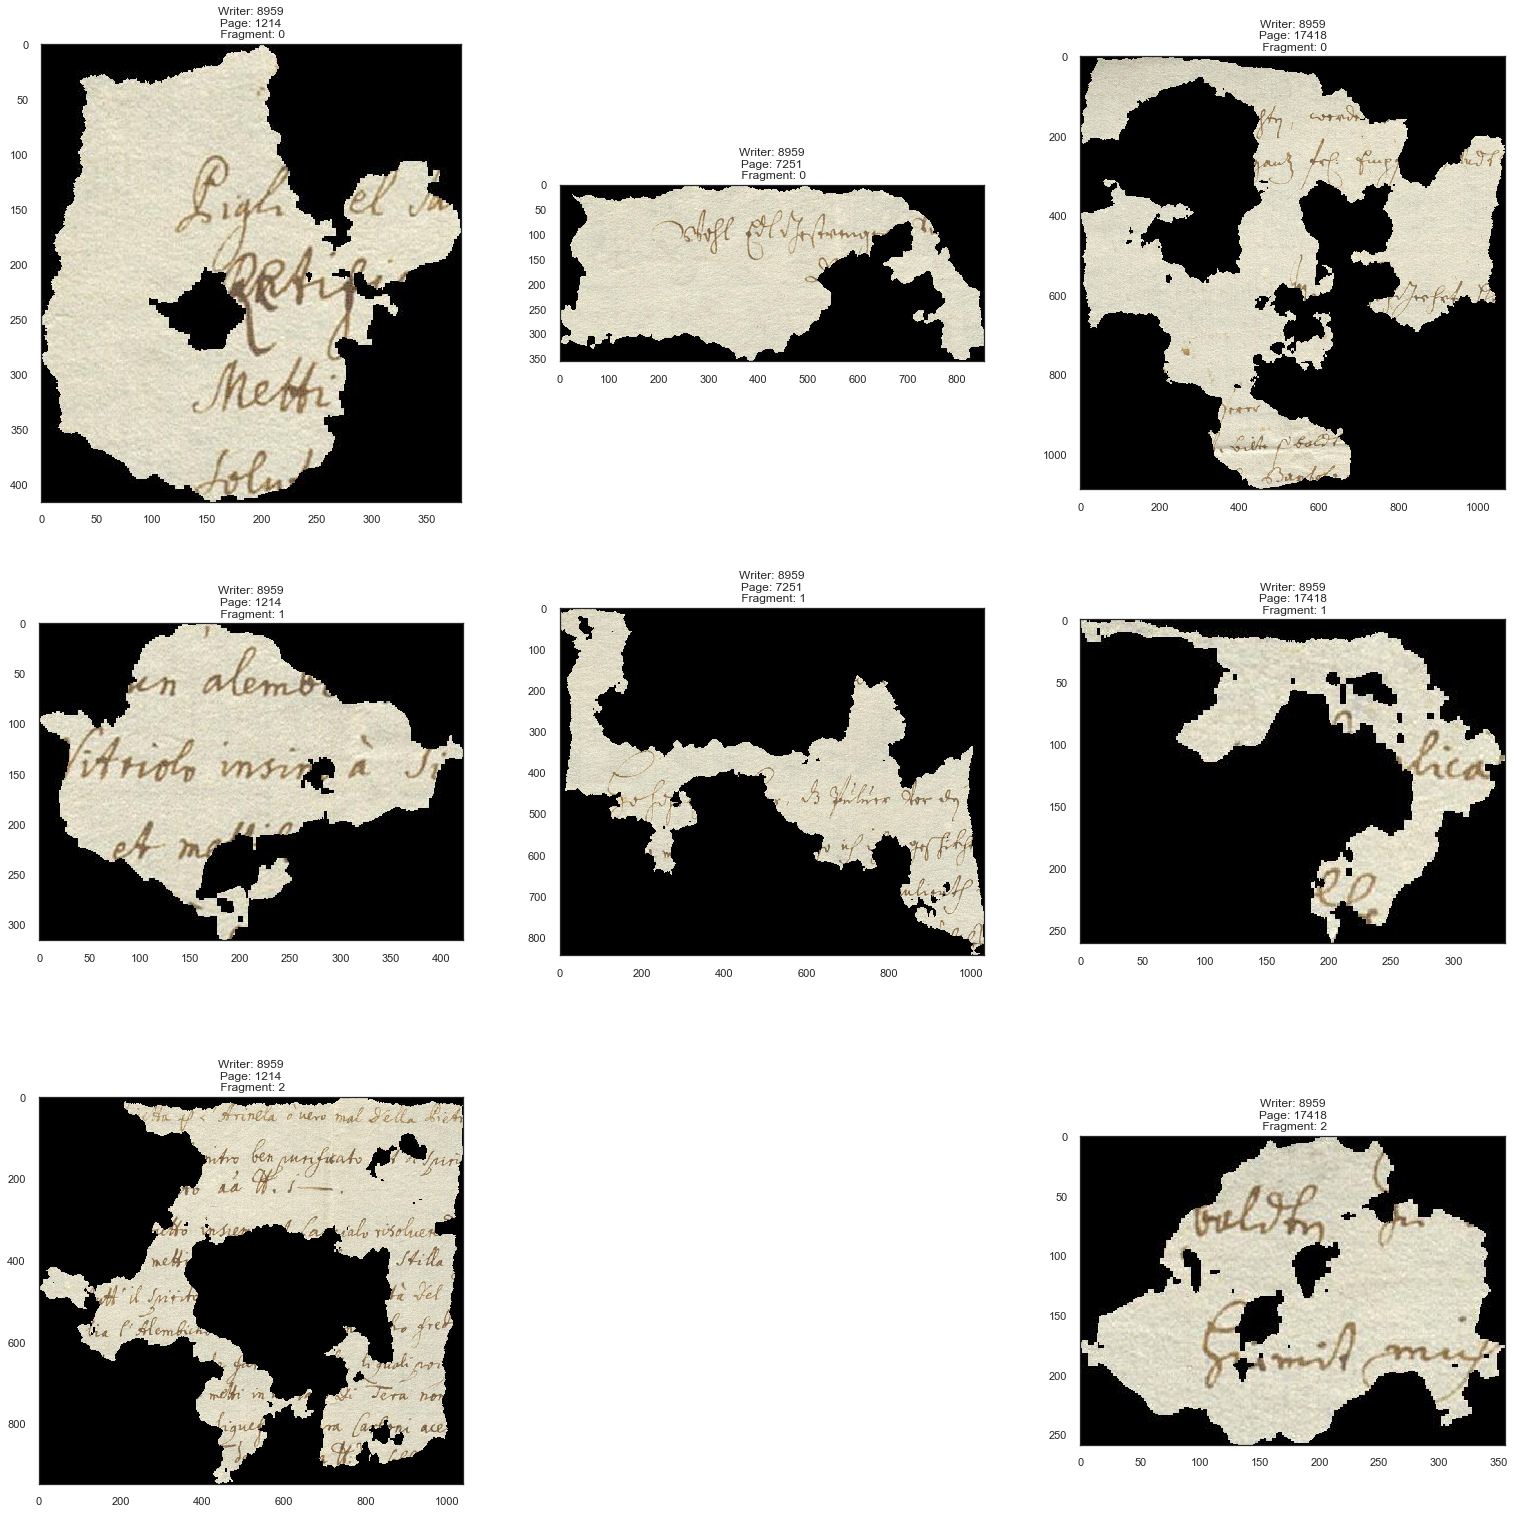

In [29]:
# create figure (fig), and array of axes (ax)
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
fig.tight_layout(pad=0.4, w_pad=5, h_pad=2)

for i, axi in enumerate(ax.flat):
    # get indices of row/column
    rowid = i // ncols
    colid = i % ncols
    current_row = writer_df.query("col_id == {} and row_id == '{}'".format(colid,rowid))
    try:
        current_page = current_row['page_id'].astype(str).values[0]
        current_fragment = current_row['fragment_id'].astype(str).values[0]
        filename = data_path +'/' + rand_writer + '_' + current_page + '_' + current_fragment + '.jpg'
        img = Image.open(filename)    
        axi.imshow(img)
        # write row/col indices as axes' title for identification
        axi.set_title('Writer: {}\nPage: {}\n Fragment: {}'.format(rand_writer,current_page,current_fragment))
    except:
        axi.set_visible(False)
        
plt.show()

fig.savefig('readme-data.svg', format='svg', bbox_inches='tight',cmap='gray')